In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# definiciones

In [7]:
def get_data(data_path):
    '''returns a DataFrame with search tracks'''
    data = pd.read_json(data_path)
    data = pd.DataFrame.from_dict(data['__collections__']["search_track"])
    return data


def preprocess_data(data):
    data = data.T
    data = data.drop(columns = ['user_longitude', 'user_latitude', '__collections__'])
    data.reset_index(level=0, inplace=True)
    data.drop(columns="index")
    data['search_method'] = data['search_method'].convert_dtypes()
    
   
    data.drop(columns='index', inplace=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True, errors='coerce')
    data['arrive'] = pd.to_datetime(data['arrive'], utc=True, errors='coerce')
    data['leave'] = pd.to_datetime(data['leave'], utc=True, errors='coerce')
    data['timestamp'] = data.timestamp.dt.strftime("%Y-%m-%d %H:%M:%S")
    data['arrive'] = data.arrive.dt.strftime("%Y-%m-%d %H:%M:%S")
    data['leave'] = data.leave.dt.strftime("%Y-%m-%d %H:%M:%S")
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['arrive'] = pd.to_datetime(data['arrive'])
    data['leave'] = pd.to_datetime(data['leave'])

    return data

def preproc(data_path):
    data = get_data(data_path)
    return preprocess_data(data)

def search_neighborhood(neighborhood, coordinates):

    bsas_map = gpd.read_file('../gopa_data/barrios-ciudad')
    neighborhood = neighborhood.upper()
    gpd_data = gpd.GeoDataFrame(coordinates,
                         geometry = gpd.points_from_xy(coordinates.search_longitude, coordinates.search_latitude))
    reservas_bsas = gpd_data[['geometry']]
    reservas_bsas = reservas_bsas.set_crs("EPSG:4326")

    if neighborhood == 'CIUDAD':
        df_barrio = bsas_map
        fig,ax = plt.subplots(figsize = (15,16))
        bsas_map.plot(ax=ax, color='lightgrey')
        gpd_data.plot(ax=ax, markersize=5, color='red')
        ax.set_xlim([-58.550, -58.325])
        ax.set_ylim([-34.700, -34.525])
        plt.show()

    else:

        try:
            df_barrio = bsas_map[bsas_map['BARRIO'] == neighborhood]
            reservas_barrio = reservas_bsas.within(df_barrio)
            cond_reservas_barrio = gpd_data.apply(lambda x: df_barrio.contains(x.geometry), axis=1)
            gpd_data['reservas_barrio'] = cond_reservas_barrio
            gpd_data = gpd_data[gpd_data.reservas_barrio == True]
            #fig,ax = plt.subplots(figsize = (15,16))
            #bsas_map.plot(ax=ax, color='lightgrey')
            #gpd_data.plot(ax=ax, markersize=5, color='red')
            #ax.set_xlim([-58.550, -58.325])
            #ax.set_ylim([-34.700, -34.525])
            #plt.show()
        except ValueError:
            print(f"Please enter another neighborhood, {neighborhood} not found")


    return gpd_data

## cargo data

In [3]:
data = preproc('../raw_data/dataBackup.json')



In [4]:
bsas_map = gpd.read_file('../gopa_data/barrios-ciudad')

In [5]:
# vemos que barrio tiene nombres en mayúscula y minúscula
bsas_map.BARRIO = bsas_map.BARRIO.map(lambda x: x.upper())

bsas_map.BARRIO.sort_values()

# visualización

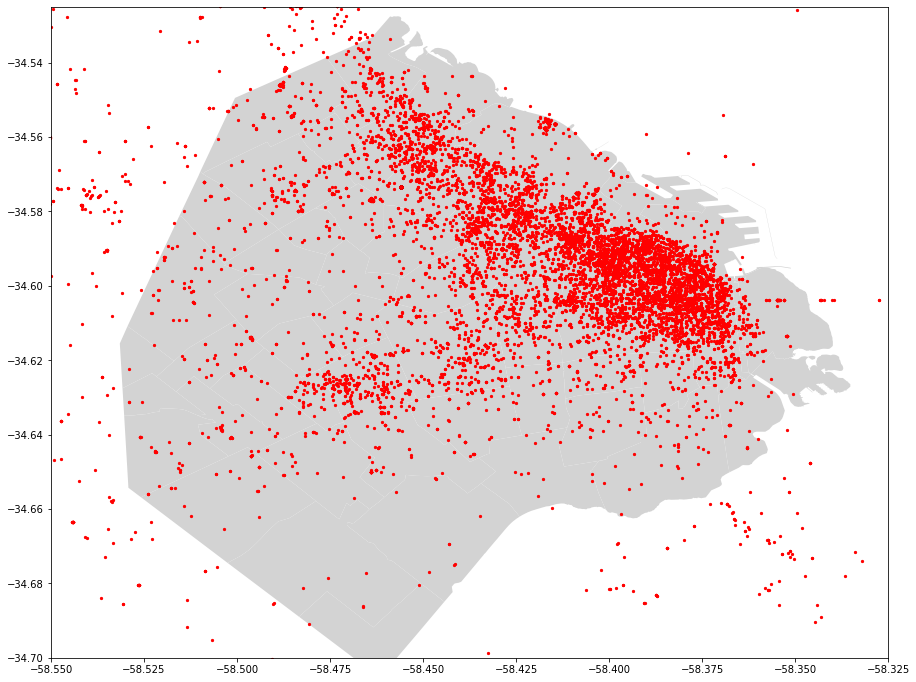

In [8]:
ciudad = search_neighborhood('CIUDAD', data)

# dataset

In [9]:
ciudad #hay que volar 'startup' que es cuando abrís la app

,arrive,search_method,leave,search_longitude,search_latitude,uid,timestamp,geometry
0,2021-03-28 16:30:13,google,2021-03-28 17:30:13,-58.404267,-34.614640,unauthenticated,2021-03-28 16:30:39,POINT (-58.40427 -34.61464)
1,2021-02-04 16:00:36,startup,2021-02-04 17:00:36,-58.419543,-34.575729,unauthenticated,2021-02-04 15:56:36,POINT (-58.41954 -34.57573)
2,2021-01-12 10:30:04,startup,2021-01-12 11:30:04,-58.414274,-34.581036,unauthenticated,2021-01-12 10:28:04,POINT (-58.41427 -34.58104)
3,2021-02-05 08:30:35,startup,2021-02-05 09:30:35,-58.433503,-34.577048,unauthenticated,2021-02-05 08:19:35,POINT (-58.43350 -34.57705)
4,2021-02-28 15:56:00,google,2021-02-28 17:32:00,-58.440447,-34.620694,None,2021-01-31 22:35:42,POINT (-58.44045 -34.62069)
...,...,...,...,...,...,...,...,...
19909,2020-09-14 06:45:26,startup,2020-09-14 07:45:26,-58.507150,-34.575842,unauthenticated,2020-09-14 06:35:26,POINT (-58.50715 -34.57584)
19910,2021-01-23 04:15:18,this_area,2021-01-23 05:15:18,-58.383415,-34.591915,unauthenticated,2021-01-23 04:12:43,POINT (-58.38341 -34.59192)
19911,2021-01-06 02:15:01,startup,2021-01-06 03:15:01,-58.413258,-34.584307,unauthenticated,2021-01-06 02:05:01,POINT (-58.41326 -34.58431)
19912,2021-03-21 19:45:07,searchInThisArea,2021-03-21 20:45:07,-58.425847,-34.631331,byadzYTQX7YaABRFTAXPYz8UKCI2,2021-03-21 19:45:08,POINT (-58.42585 -34.63133)


# otro approach

In [16]:
def filtrador(barrios ):
    #cargo el dataset entero
    gpd_data = gpd.GeoDataFrame(data,
                         geometry = gpd.points_from_xy(data.search_longitude, data.search_latitude))
    
    
    bsas_map = gpd.read_file('../gopa_data/barrios-ciudad')

    bsas_map.BARRIO = bsas_map.BARRIO.map(lambda x: x.upper()) #hago upper todo
    #elimino lo necesario y seteo el barrio como índice para fácil acceso
    bsas_map =bsas_map.set_index('BARRIO').drop(columns = ['COMUNA','GEOJSON']) 
    bsas_map = bsas_map.T  #transpongo para fácil acceso con bsas_map['BARRIO'][0]
    
    #paso todo a upper por si las dudas
    barrios = [barrio.upper() for barrio in barrios]
    
    filtro = gpd_data.within(bsas_map[barrios[0]] [0])
    resultados = gpd_data[filtro]
    resultados['BARRIO'] = barrios[0]
    no_encontrados =[]

    if len(barrios) > 1:
        for barrio in barrios[1:]: #comienzo a filtrar el DF
            if barrio in bsas_map.columns:
                filtro = gpd_data.within(bsas_map[barrio][0])
                nuevo_barrio = gpd_data[filtro]
                nuevo_barrio['BARRIO'] = barrio
                resultados = pd.concat([resultados, nuevo_barrio], ignore_index = True)
            else :
                print(f'{barrio} no se encuentra o no se reconoce')
                no_encontrados.append(barrio)
                
    if len(no_encontrados) != 0:
        print(no_encontrados , 'no han sido procesados')
    
    return resultados

In [17]:
#ejemplo!
filtrador(['ESCOLLERA EXTERIOR', 'DIQUE 4' ])

,arrive,search_method,leave,search_longitude,search_latitude,uid,timestamp,geometry,BARRIO
0,2021-03-12 12:03:00,searchInThisArea,2021-03-12 13:03:00,-58.365641,-34.601053,None,2021-03-12 01:05:27,POINT (-58.36564 -34.60105),DIQUE 4
1,2021-02-05 22:30:00,searchInThisArea,2021-02-06 04:30:00,-58.365066,-34.604481,None,2021-02-05 17:57:59,POINT (-58.36507 -34.60448),DIQUE 4
2,2021-03-12 12:03:00,updateTimeHome,2021-03-12 13:35:00,-58.365641,-34.601053,None,2021-03-12 01:05:56,POINT (-58.36564 -34.60105),DIQUE 4


# conseguir toda la data!

In [ ]:
ciudad_filtrado = filtrador(bsas_map.BARRIO)

In [ ]:
#ESCOLLERA EXTERIOR, DIQUE 1, OTROS BARRIOS NO DAN! NO SE POR QUÉ

In [ ]:
ciudad_filtrado.groupby('BARRIO').count().sort_values(by = 'leave',ascending=False)

# exporto el dataset

In [ ]:
ciudad_filtrado.to_csv('ciudad_barrios.csv')